# INTRODUCTION
URL of chosen Dataset: https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis 
</br>How this data is relevant:
- Contains information on Supply Chain on customer and item records
- This dataset contains historical data of a wide range of items and historical data
- Sufficient data columns and rows
  
### Target: 
Objective:
Forecast monthly sales quantity using a supervised regression model: Random Forest Regression trained on at least 3 years of historical data of previous sales data. The model will support inventory planning by predicting how order quantity responds to key factors such as historical sales trends, pricing, discounts, promotions and the relationship between the respective department/type.

Initial Approach: Begin with Random Forest Regression to capture nonlinear dependencies in features such as lagged sales, price, discount events, and product metadata. Explore additional models (e.g., XGBoost, Ridge Regression) based on performance benchmarks (MAPE, RMSE).

### Pain point to solve: 
Forecasting sample items and their demand so to ensure effective sample storage management through prioritising important samples and identify which samples are higher in demand.</br>
### Type of model used:
Random Forest Regression

# DATA COLLECTION

In [1]:
# Standard imports
import os

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('supplychain.csv')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# DATA PREPROCESSING AND EDA

Columns selected for data prep:
1. Order Item Quantity
3. Order Item Discount
4. Order Item Discount Rate
5. Order date (DateOrders)
6. Order Status
7. Order Country
8. Product Category Id
9. Product Name
10. Customer Segment
11. Category Name
12. Department Name


## DATA PREPARATION

In [3]:
# Keeping the desired data
df = df[['Order Item Quantity', 'Order Item Discount', 
         'Order Item Discount Rate', 'order date (DateOrders)', 'Order Status','Order Country',
         'Product Category Id', 'Product Name', 
         'Customer Segment', 'Category Name', 
         'Department Name', 'Product Price'
        ]]

#Only keeping COMPLETE order statuses
df = df[df['Order Status'] == 'COMPLETE']

#Renaming order date column
df = df.rename(columns={'order date (DateOrders)': 'Order Date'})
df

,Order Item Quantity,Order Item Discount,Order Item Discount Rate,Order Date,Order Status,Order Country,Product Category Id,Product Name,Customer Segment,Category Name,Department Name,Product Price
0,1,13.110000,0.04,1/31/2018 22:56,COMPLETE,Indonesia,73,Smart watch,Consumer,Sporting Goods,Fitness,327.750000
3,1,22.940001,0.07,1/13/2018 11:45,COMPLETE,Australia,73,Smart watch,Home Office,Sporting Goods,Fitness,327.750000
6,1,39.330002,0.12,1/13/2018 10:42,COMPLETE,China,73,Smart watch,Home Office,Sporting Goods,Fitness,327.750000
13,1,81.940002,0.25,1/13/2018 8:15,COMPLETE,India,73,Smart watch,Corporate,Sporting Goods,Fitness,327.750000
15,1,3.280000,0.01,1/13/2018 7:33,COMPLETE,India,73,Smart watch,Corporate,Sporting Goods,Fitness,327.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
180500,1,16.000000,0.04,1/16/2016 15:35,COMPLETE,Australia,45,Field & Stream Sportsman 16 Gun Fire Safe,Consumer,Fishing,Fan Shop,399.980011
180505,1,40.000000,0.10,1/16/2016 13:28,COMPLETE,China,45,Field & Stream Sportsman 16 Gun Fire Safe,Corporate,Fishing,Fan Shop,399.980011
180508,1,60.000000,0.15,1/16/2016 7:10,COMPLETE,China,45,Field & Stream Sportsman 16 Gun Fire Safe,Corporate,Fishing,Fan Shop,399.980011
180512,1,80.000000,0.20,1/16/2016 6:07,COMPLETE,China,45,Field & Stream Sportsman 16 Gun Fire Safe,Home Office,Fishing,Fan Shop,399.980011


In [4]:
df['Customer Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [5]:
df['Category Name'].value_counts()

Category Name
Cleats                  8085
Men's Footwear          7369
Women's Apparel         7036
Indoor/Outdoor Games    6348
Fishing                 5645
Water Sports            5000
Camping & Hiking        4517
Cardio Equipment        4117
Shop By Sport           3646
Electronics             1029
Accessories              609
Golf Balls               494
Girls' Apparel           383
Trade-In                 347
Golf Gloves              335
Video Games              272
Women's Clothing         218
Children's Clothing      206
Baseball & Softball      203
Hockey                   201
Cameras                  198
Golf Shoes               192
Toys                     184
Pet Supplies             173
DVDs                     160
Computers                154
Golf Apparel             153
Garden                   153
Crafts                   151
Consumer Electronics     150
Hunting & Shooting       149
Health and Beauty        136
Boxing & MMA             135
Music                    132


Showing any Missing Values

In [6]:
df.isnull().sum()

Order Item Quantity         0
Order Item Discount         0
Order Item Discount Rate    0
Order Date                  0
Order Status                0
Order Country               0
Product Category Id         0
Product Name                0
Customer Segment            0
Category Name               0
Department Name             0
Product Price               0
dtype: int64

In [7]:
#Determining the type in each column
df.dtypes

Order Item Quantity           int64
Order Item Discount         float64
Order Item Discount Rate    float64
Order Date                   object
Order Status                 object
Order Country                object
Product Category Id           int64
Product Name                 object
Customer Segment             object
Category Name                object
Department Name              object
Product Price               float64
dtype: object

### Reformatting Data

In [8]:
# Changing and formatting order date into datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df["Order Year"] = df["Order Date"].dt.year
df["Order Month"] = df["Order Date"].dt.month
df["Order Day"] = df["Order Date"].dt.dayofweek
df['Order YearMonth'] = df['Order Date'].dt.strftime('%Y-%m')

In [9]:
df.dtypes

Order Item Quantity                  int64
Order Item Discount                float64
Order Item Discount Rate           float64
Order Date                  datetime64[ns]
Order Status                        object
Order Country                       object
Product Category Id                  int64
Product Name                        object
Customer Segment                    object
Category Name                       object
Department Name                     object
Product Price                      float64
Order Year                           int32
Order Month                          int32
Order Day                            int32
Order YearMonth                     object
dtype: object

### Changing Category Name for simplified database

- Clothing
- Technology
- Sports and Fitness
- Other

In [10]:
df['Category Name'].value_counts()

Category Name
Cleats                  8085
Men's Footwear          7369
Women's Apparel         7036
Indoor/Outdoor Games    6348
Fishing                 5645
Water Sports            5000
Camping & Hiking        4517
Cardio Equipment        4117
Shop By Sport           3646
Electronics             1029
Accessories              609
Golf Balls               494
Girls' Apparel           383
Trade-In                 347
Golf Gloves              335
Video Games              272
Women's Clothing         218
Children's Clothing      206
Baseball & Softball      203
Hockey                   201
Cameras                  198
Golf Shoes               192
Toys                     184
Pet Supplies             173
DVDs                     160
Computers                154
Golf Apparel             153
Garden                   153
Crafts                   151
Consumer Electronics     150
Hunting & Shooting       149
Health and Beauty        136
Boxing & MMA             135
Music                    132


In [11]:
df["Category Name"].unique

<bound method Series.unique of 0         Sporting Goods
3         Sporting Goods
6         Sporting Goods
13        Sporting Goods
15        Sporting Goods
               ...      
180500           Fishing
180505           Fishing
180508           Fishing
180512           Fishing
180515           Fishing
Name: Category Name, Length: 59491, dtype: object>

In [12]:
df['Category Name'] = df['Category Name'].str.strip()

In [14]:
category_map = {
    "Apparel & Footwear": [
        "Cleats", "Men's Footwear", "Women's Apparel"
    ],
    "Sports and Fitness": [
        "Cardio Equipment", "Indoor/Outdoor Games", "Fishing", "Water Sports", "Camping & Hiking",
        "Shop By Sport"
    ],
    "Technology": [
        "Electronics", "Computers", "Cameras", "Video Games",
    ],
    "Other": [
        "Garden", "Pet Supplies"
    ]
}


# Reverse mapping: specific -> general
flat_map = {specific: general 
            for general, specifics in category_map.items()
            for specific in specifics}

df["Category Name"] = df["Category Name"].replace(flat_map)
print(df["Category Name"].nunique())

39


In [22]:
df["Category Name"].unique()

array(['Sports & Outdoor Gear', 'Electronics & Gadgets',
       'Cardio Equipment', 'Apparel & Footwear', 'Home, Garden & Crafts',
       'Miscellaneous', 'Media & Entertainment', 'Toys & Baby Products',
       'Golf Equipment & Accessories', 'Pet Supplies'], dtype=object)

In [23]:
df['Category Name'].value_counts()

Category Name
Sports & Outdoor Gear           26400
Apparel & Footwear              23513
Cardio Equipment                 4117
Electronics & Gadgets            2061
Golf Equipment & Accessories     1310
Miscellaneous                    1092
Home, Garden & Crafts             304
Media & Entertainment             271
Toys & Baby Products              250
Pet Supplies                      173
Name: count, dtype: int64

# EDA
At least with Pandas and Seaborn
<br>Heatmap


## Univariate Analysis


Most customers will often buy one product per purchase rather than multiple

<Axes: xlabel='Order Item Quantity', ylabel='Count'>

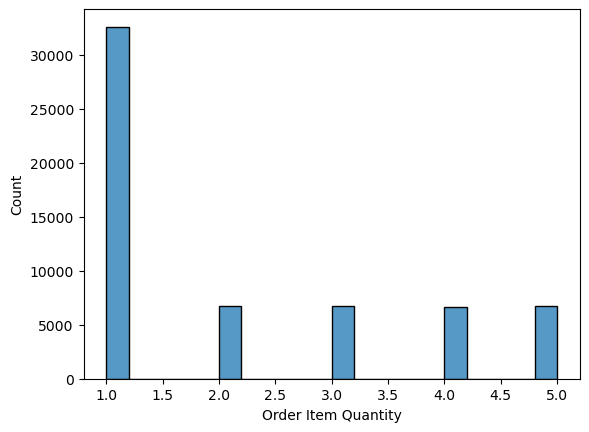

In [16]:
df['Order Item Quantity'].describe()
sns.histplot(df['Order Item Quantity'], bins=20)

### Identifying what most customers are purchasing based on the average total amount of orders per product

C:\Users\euito\AppData\Local\Temp\ipykernel_26168\4112108565.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


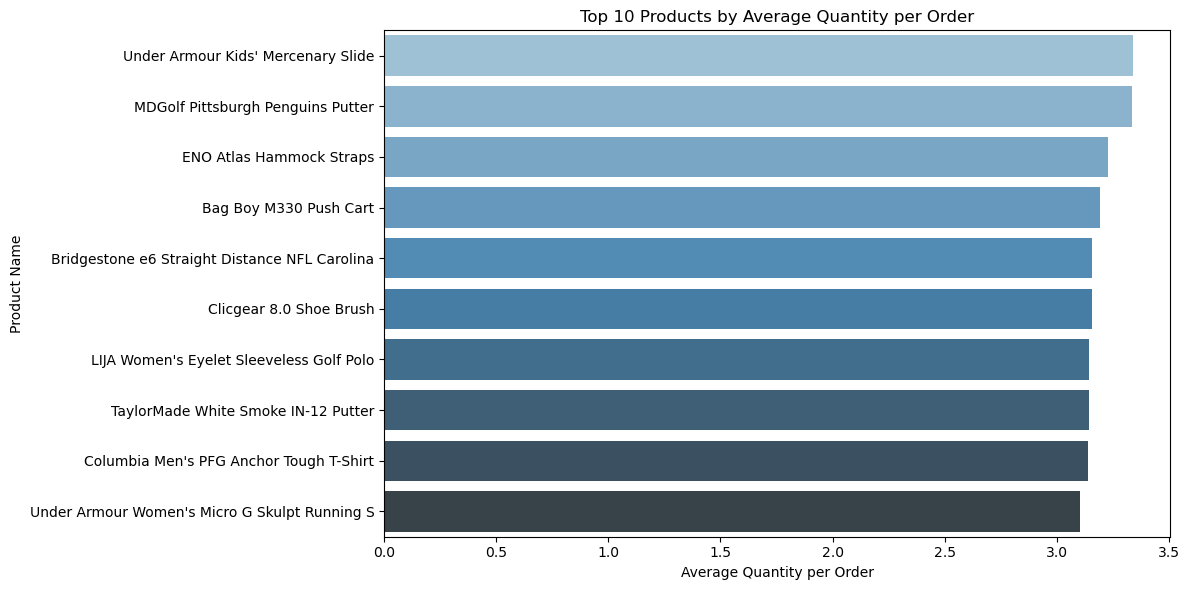

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by average quantity and take top 10
top_avg_products = product_summary.sort_values(
    by='Avg Quantity per Order', ascending=False
).head(10)

# Set plot size
plt.figure(figsize=(12, 6))

# Create the barplot
sns.barplot(
    data=top_avg_products,
    x='Avg Quantity per Order',
    y='Product Name',
    palette='Blues_d'
)

# Add labels and title
plt.title('Top 10 Products by Average Quantity per Order')
plt.xlabel('Average Quantity per Order')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


### Displaying the spread of the total items to the different departments

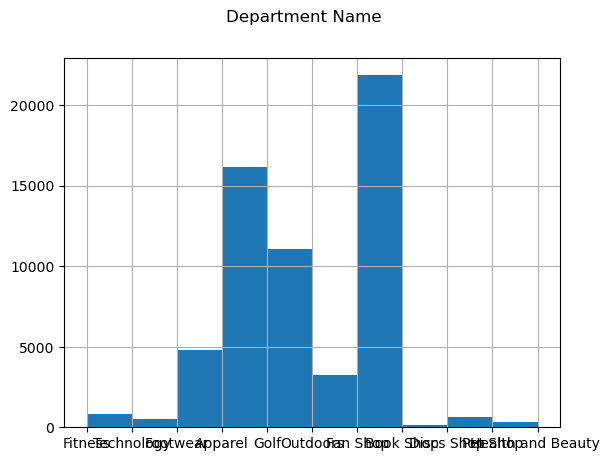

In [18]:
col = "Department Name"
df[col].hist()
plt.suptitle(col)
plt.show()

### *Total Order Item to Department*

C:\Users\euito\AppData\Local\Temp\ipykernel_26168\165832324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pcTotal.sort_values('Order Item Quantity', ascending=False),


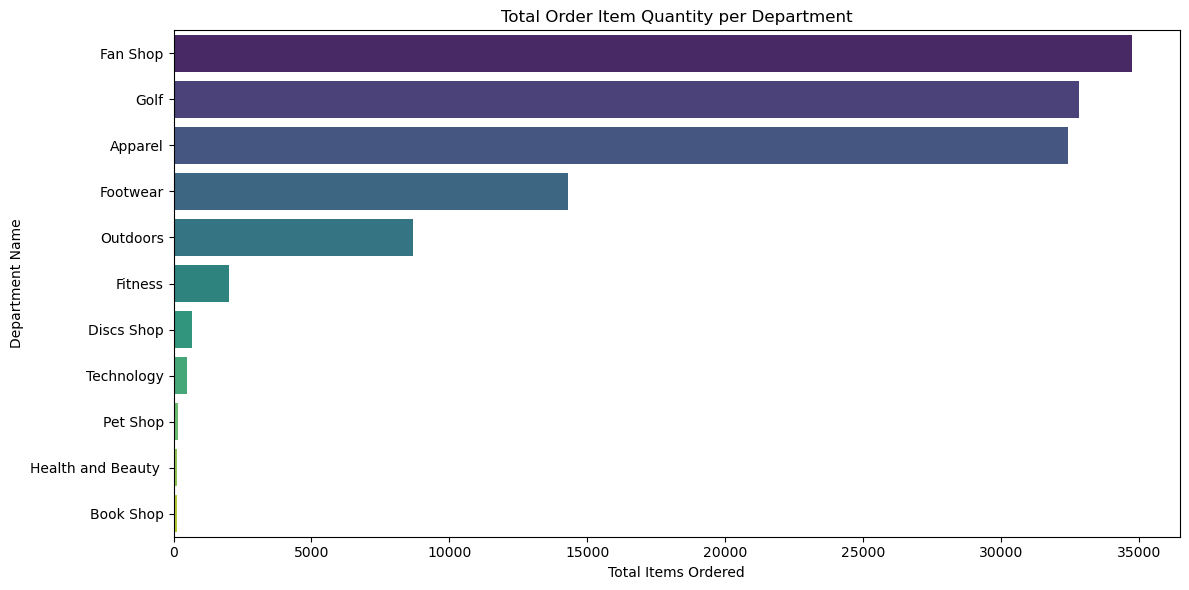

In [19]:
## Plots Total Order Item to Department
plt.figure(figsize=(12, 6))
sns.barplot(data=pcTotal.sort_values('Order Item Quantity', ascending=False),
            x='Order Item Quantity', y='Department Name', palette='viridis')

plt.title('Total Order Item Quantity per Department')
plt.xlabel('Total Items Ordered')
plt.ylabel('Department Name')
plt.tight_layout()
plt.show()


C:\Users\euito\AppData\Local\Temp\ipykernel_26168\1872136564.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Department Name', y='Order Item Quantity', estimator='mean', ci=None)


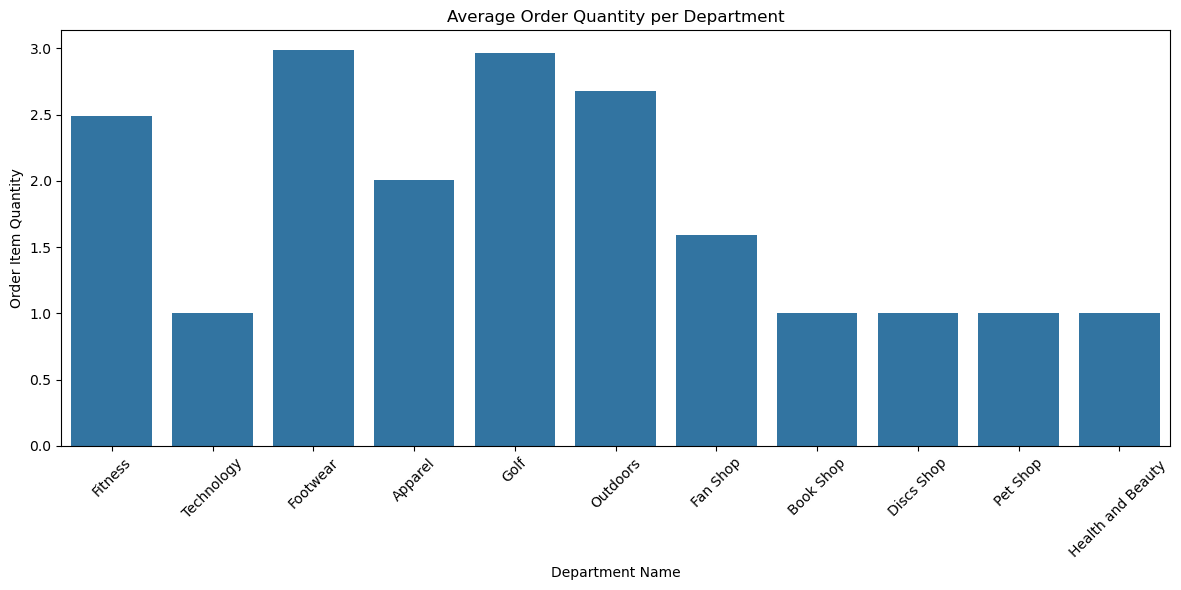

In [20]:
## Average quantity of each product by Dept
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Department Name', y='Order Item Quantity', estimator='mean', ci=None)
plt.title('Average Order Quantity per Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Heatmaps

### *Heat map to identify the relationships between item quantity and product price, discount, discount rate*

In [22]:
numerical_cols = ['Order Item Quantity', 'Order Item Product Price', 'Order Item Discount', 'Order Item Discount Rate']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


KeyError: "['Order Item Product Price'] not in index"

<Figure size 800x600 with 0 Axes>

## Time Series Graphs

### *Plotting the total number of items bought over a series of a few months*

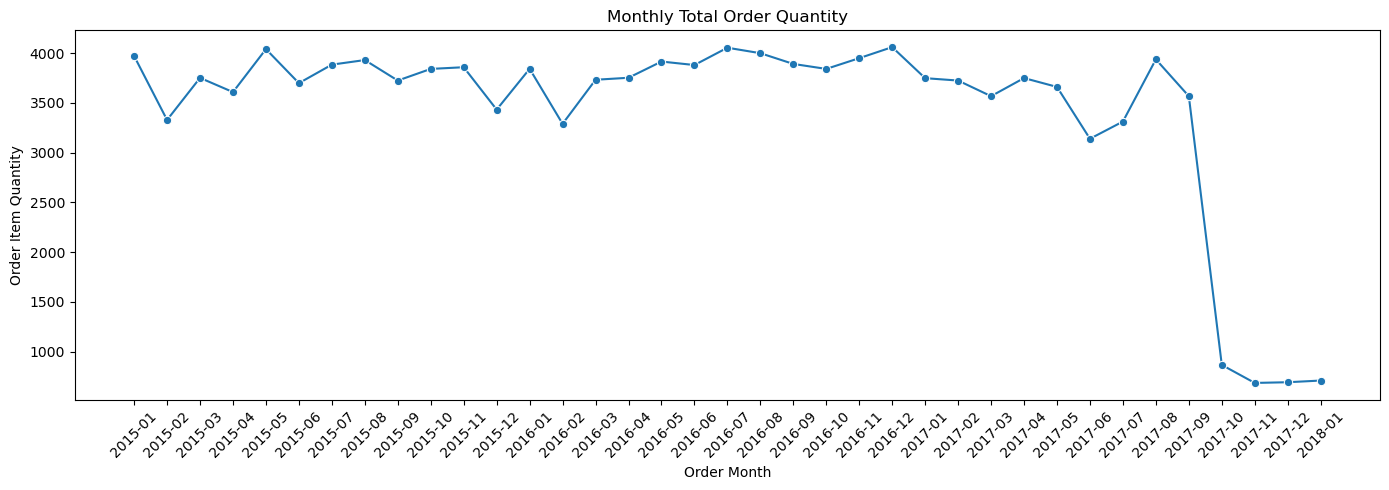

In [42]:
df['Order Month'] = df['Order Date'].dt.to_period('M').astype(str)

monthly_orders = df.groupby('Order Month')['Order Item Quantity'].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_orders, x='Order Month', y='Order Item Quantity', marker='o')
plt.title('Monthly Total Order Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### *Plotting the total number of items bought over a series of years*

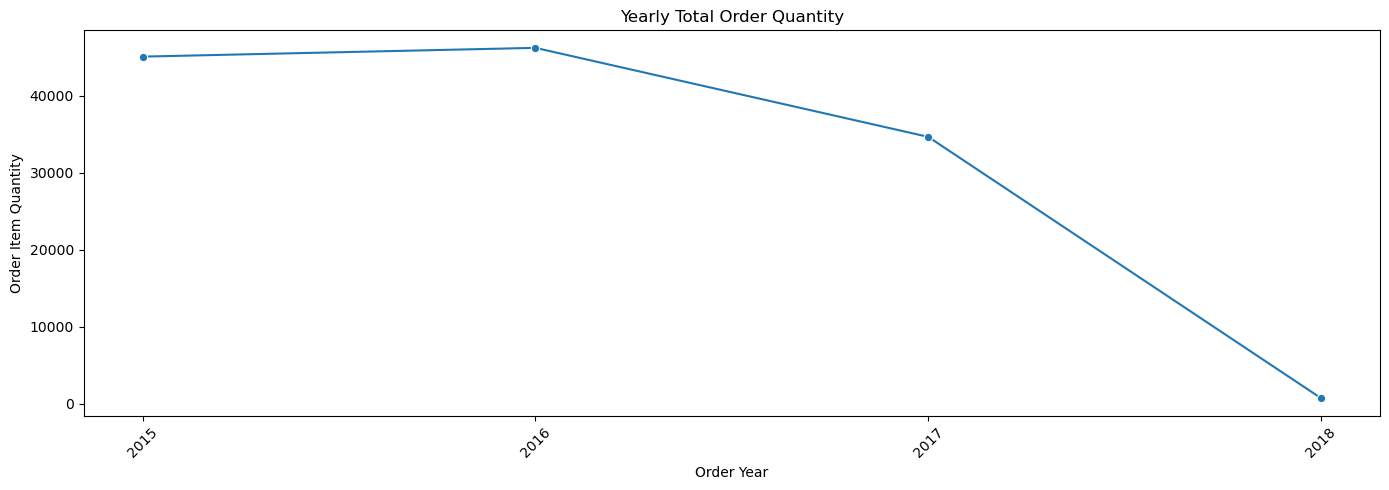

In [43]:
df['Order Year'] = df['Order Date'].dt.to_period('Y').astype(str)

monthly_orders = df.groupby('Order Year')['Order Item Quantity'].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_orders, x='Order Year', y='Order Item Quantity', marker='o')
plt.title('Yearly Total Order Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MODELLING
Type of model used: Linear Regression

### Feature Engineering

#### Deciding on useful features for predictions

NOTE ON THE OBJECTIVE AGAIN:
I want to forecast the total amount of samples sold per category for each month (Total quantity per category per month)


In [24]:
df.head()

,Order Item Quantity,Order Item Discount,Order Item Discount Rate,Order Date,Order Status,Order Country,Product Category Id,Product Name,Customer Segment,Category Name,Department Name,Product Price,Order Year,Order Month,Order Day,Order YearMonth
0,1,13.110000,0.04,2018-01-31 22:56:00,COMPLETE,Indonesia,73,Smart watch,Consumer,Sports & Outdoor Gear,Fitness,327.75,2018,1,2,2018-01
3,1,22.940001,0.07,2018-01-13 11:45:00,COMPLETE,Australia,73,Smart watch,Home Office,Sports & Outdoor Gear,Fitness,327.75,2018,1,5,2018-01
6,1,39.330002,0.12,2018-01-13 10:42:00,COMPLETE,China,73,Smart watch,Home Office,Sports & Outdoor Gear,Fitness,327.75,2018,1,5,2018-01
13,1,81.940002,0.25,2018-01-13 08:15:00,COMPLETE,India,73,Smart watch,Corporate,Sports & Outdoor Gear,Fitness,327.75,2018,1,5,2018-01
15,1,3.280000,0.01,2018-01-13 07:33:00,COMPLETE,India,73,Smart watch,Corporate,Sports & Outdoor Gear,Fitness,327.75,2018,1,5,2018-01


In [25]:
df = df.drop(columns=['Order Country','Product Name','Department Name','Order Status'])

#### Calculating total quantity, order frequency and average quantity per order for each category

In [26]:
# Calculating the average number of products sold per category
category_totals = df.groupby('Category Name')['Order Item Quantity'].sum().reset_index()
category_totals.columns = ['Category Name', 'Total Quantity Ordered (Per Category)']
unique_value_count = df['Category Name'].value_counts()

category_frequency = unique_value_count.reset_index()
category_frequency.columns = ['Category Name', 'Order Frequency']
category_summary = pd.merge(category_totals, category_frequency, on='Category Name')
category_summary['Avg Quantity per Order'] = category_summary['Total Quantity Ordered (Per Category)'] / category_summary['Order Frequency']

category_summary

,Category Name,Total Quantity Ordered (Per Category),Order Frequency,Avg Quantity per Order
0,Apparel & Footwear,54654,23513,2.324416
1,Cardio Equipment,12364,4117,3.003158
2,Electronics & Gadgets,4130,2061,2.003882
3,Golf Equipment & Accessories,3359,1310,2.564122
4,"Home, Garden & Crafts",304,304,1.000000
5,Media & Entertainment,306,271,1.129151
6,Miscellaneous,2947,1092,2.698718
7,Pet Supplies,173,173,1.000000
8,Sports & Outdoor Gear,48137,26400,1.823371
9,Toys & Baby Products,250,250,1.000000


In [27]:
df = df.merge( category_summary[['Category Name', 'Total Quantity Ordered (Per Category)', 'Order Frequency', 'Avg Quantity per Order']],
    on='Category Name',
    how='left')
df.head()

,Order Item Quantity,Order Item Discount,Order Item Discount Rate,Order Date,Product Category Id,Customer Segment,Category Name,Product Price,Order Year,Order Month,Order Day,Order YearMonth,Total Quantity Ordered (Per Category),Order Frequency,Avg Quantity per Order
0,1,13.110000,0.04,2018-01-31 22:56:00,73,Consumer,Sports & Outdoor Gear,327.75,2018,1,2,2018-01,48137,26400,1.823371
1,1,22.940001,0.07,2018-01-13 11:45:00,73,Home Office,Sports & Outdoor Gear,327.75,2018,1,5,2018-01,48137,26400,1.823371
2,1,39.330002,0.12,2018-01-13 10:42:00,73,Home Office,Sports & Outdoor Gear,327.75,2018,1,5,2018-01,48137,26400,1.823371
3,1,81.940002,0.25,2018-01-13 08:15:00,73,Corporate,Sports & Outdoor Gear,327.75,2018,1,5,2018-01,48137,26400,1.823371
4,1,3.280000,0.01,2018-01-13 07:33:00,73,Corporate,Sports & Outdoor Gear,327.75,2018,1,5,2018-01,48137,26400,1.823371


In [28]:
df['Total Sales'] = df['Order Item Quantity'] * df['Product Price']

# Then group by Category and YearMonth
monthly_sales = df.groupby(['Category Name', 'Order YearMonth']).agg({
    'Order Item Quantity': 'sum',
    'Total Sales': 'sum'
}).reset_index()

monthly_sales

,Category Name,Order YearMonth,Order Item Quantity,Total Sales
0,Apparel & Footwear,2015-01,1677,105280.262299
1,Apparel & Footwear,2015-02,1519,97905.982258
2,Apparel & Footwear,2015-03,1541,99546.072262
3,Apparel & Footwear,2015-04,1593,102840.742352
4,Apparel & Footwear,2015-05,1652,108614.462624
...,...,...,...,...
221,Sports & Outdoor Gear,2017-12,48,15732.000000
222,Sports & Outdoor Gear,2018-01,68,22287.000000
223,Toys & Baby Products,2017-10,27,1595.160049
224,Toys & Baby Products,2017-12,126,3308.100068


#### Final Features

In [29]:
# Fix: Merge on both Category Name AND Order YearMonth to properly match records
df = df.merge(monthly_sales[['Category Name', 'Order YearMonth', 'Order Item Quantity', 'Total Sales']], 
              on=['Category Name', 'Order YearMonth'], 
              how='left',
              suffixes=('', '_Monthly'))

# Rename the merged columns for clarity
df = df.rename(columns={
    'Order Item Quantity_Monthly': 'Monthly_Quantity_Sold',
    'Total Sales': 'Monthly_Total_Sales'
})

In [30]:
# Keeping only relevant columns for the model
df = df.drop(columns=['Order Item Quantity', 'Order Day', 'Order Date','Order Frequency',
                       'Avg Quantity per Order', 'Order Year',
                        'Order Month', 'Order Item Discount','Total Quantity Ordered (Per Category)',
                        'Monthly_Total_Sales'])
df = df.groupby(['Order YearMonth', 'Category Name']).agg({
    'Product Category Id': 'first',             # Keep the first Product Category Id
    'Product Price': 'mean',                    # Average price per category-month
    'Customer Segment': 'first',                # Dominant segment   
    'Order Item Discount Rate': 'mean',         # Average discount rate
    'Monthly_Quantity_Sold': 'first'            # Target (already aggregated)
}).reset_index()
df = df.rename(columns={'Product Price': 'Average Product Price'})
df.head()

,Order YearMonth,Category Name,Product Category Id,Average Product Price,Customer Segment,Order Item Discount Rate,Monthly_Quantity_Sold
0,2015-01,Apparel & Footwear,17,74.081082,Consumer,0.100058,1677
1,2015-01,Cardio Equipment,9,98.960733,Consumer,0.099632,386
2,2015-01,Electronics & Gadgets,13,39.617908,Consumer,0.093023,134
3,2015-01,Golf Equipment & Accessories,36,23.967619,Corporate,0.100476,113
4,2015-01,Miscellaneous,40,22.290000,Corporate,0.087500,123


#### Adding Time Series

In [31]:
# Use your existing df (the one with Monthly_Quantity_Sold)
print(f"Starting with df shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Convert Order YearMonth to datetime for feature extraction
df['Order_Date'] = pd.to_datetime(df['Order YearMonth'])

# Extract numerical time features that can handle future dates
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Quarter'] = df['Order_Date'].dt.quarter

# Create trend feature (months since the start of data)
start_date = df['Order_Date'].min()
df['Months_Since_Start'] = ((df['Order_Date'] - start_date).dt.days / 30.44).round().astype(int)

# Create cyclical features for seasonality (important for forecasting!)
df['Month_Sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_Cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Create year trend (helps with long-term patterns)
df['Year_Trend'] = df['Year'] - df['Year'].min()

# Drop the original time columns we don't need
df = df.drop(columns=['Order YearMonth', 'Order_Date'])

Starting with df shape: (226, 7)
Columns: ['Order YearMonth', 'Category Name', 'Product Category Id', 'Average Product Price', 'Customer Segment', 'Order Item Discount Rate', 'Monthly_Quantity_Sold']


#### Encoding Features

In [32]:
# Only encode truly categorical features (not time!)
df_encoded = df

# Label encode Category Name
le_category = LabelEncoder()
df_encoded['Category Name'] = le_category.fit_transform(df_encoded['Category Name'])

# One-hot encode Customer Segment
df_encoded = pd.get_dummies(df_encoded, columns=['Customer Segment'], drop_first=True)

#### X and y test 

In [33]:
# Separate features and target
X_timeseries = df_encoded.drop(columns=['Monthly_Quantity_Sold'])
y_timeseries = df_encoded['Monthly_Quantity_Sold']

print(f"Features shape: {X_timeseries.shape}")
print(f"Target shape: {y_timeseries.shape}")

print(f"\nFeature columns:")
for i, col in enumerate(X_timeseries.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nTime-related features:")
time_features = ['Year', 'Month', 'Quarter', 'Months_Since_Start', 'Month_Sin', 'Month_Cos', 'Year_Trend']
for feature in time_features:
    if feature in X_timeseries.columns:
        print(f"✅ {feature}")

print(f"\nBusiness features:")
business_features = ['Category Name', 'Product Category Id', 'Average Product Price', 'Order Item Discount Rate']
for feature in business_features:
    if feature in X_timeseries.columns:
        print(f"✅ {feature}")

Features shape: (226, 13)
Target shape: (226,)

Feature columns:
 1. Category Name
 2. Product Category Id
 3. Average Product Price
 4. Order Item Discount Rate
 5. Year
 6. Month
 7. Quarter
 8. Months_Since_Start
 9. Month_Sin
10. Month_Cos
11. Year_Trend
12. Customer Segment_Corporate
13. Customer Segment_Home Office

Time-related features:
✅ Year
✅ Month
✅ Quarter
✅ Months_Since_Start
✅ Month_Sin
✅ Month_Cos
✅ Year_Trend

Business features:
✅ Category Name
✅ Product Category Id
✅ Average Product Price
✅ Order Item Discount Rate


#### Model Training

In [34]:
# 4️⃣ TRAIN TIME SERIES MODEL
import xgboost as xgb
# Split the data
X_train_ts, X_test_ts, y_train_ts, y_test_ts_ts = train_test_split(
    X_timeseries, y_timeseries, test_size=0.2, random_state=42
)

print(f"Training set: {X_train_ts.shape}")
print(f"Test set: {X_test_ts.shape}")

# Train XGBoost model optimized for time series
model_timeseries = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    reg_alpha=0.1,
    reg_lambda=0.5
)

model_timeseries.fit(
    X_train_ts, y_train_ts,
    eval_set=[(X_test_ts, y_test_ts_ts)],
    verbose=False
)

# Make predictions
y_pred_ts_ts = model_timeseries.predict(X_test_ts)

# Evaluate performance
r2_ts = r2_score(y_test_ts_ts, y_pred_ts_ts)
rmse_ts = np.sqrt(mean_squared_error(y_test_ts_ts, y_pred_ts_ts))
mae_ts = mean_absolute_error(y_test_ts_ts, y_pred_ts_ts)
mape_ts = np.mean(np.abs((y_test_ts_ts - y_pred_ts_ts) / y_test_ts_ts)) * 100
print(f"R² Score: {r2_ts:.4f}")
print(f"RMSE: {rmse_ts:.2f}")
print(f"MAE: {mae_ts:.2f}")
print(f"MAPE: {mape_ts:.2f}%")

# Cross-validation
cv_scores_ts = cross_val_score(model_timeseries, X_timeseries, y_timeseries, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores_ts}")
print(f"Mean CV R²: {cv_scores_ts.mean():.4f} (+/- {cv_scores_ts.std() * 2:.4f})")

Training set: (180, 13)
Test set: (46, 13)
R² Score: 0.9482
RMSE: 141.95
MAE: 74.52
MAPE: 182.67%
Cross-validation R² scores: [0.99311298 0.98533452 0.99420226 0.9835003  0.16856527]
Mean CV R²: 0.8249 (+/- 0.6564)


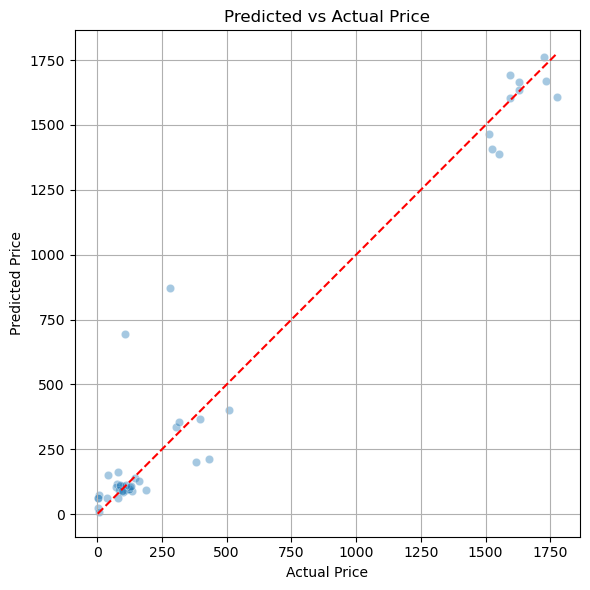

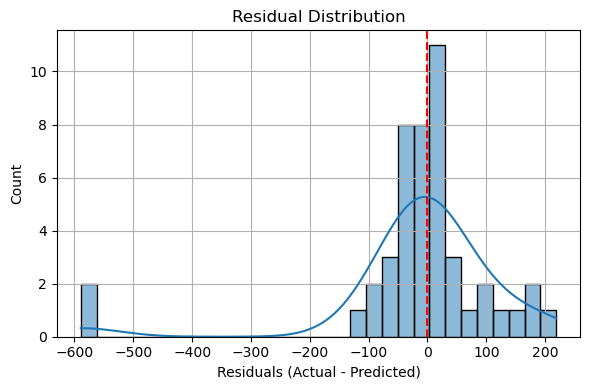

In [39]:
# Enter your code here

# 1. Predict on test set
y_pred_ts = model_timeseries.predict(X_test_ts)

# 2. Predicted vs Actual
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_ts , y=y_pred_ts, alpha=0.4)
plt.plot([y_test_ts.min(), y_test_ts.max()], [y_test_ts.min(), y_test_ts.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Residual Plot
residuals = y_test_ts - y_pred_ts
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals (Actual - Predicted)')
plt.title('Residual Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Feature Importance

TOP 10 MOST IMPORTANT FEATURES:
                     Feature  Importance
10                Year_Trend    0.438531
7         Months_Since_Start    0.216241
4                       Year    0.099742
2      Average Product Price    0.093249
0              Category Name    0.082042
1        Product Category Id    0.047757
6                    Quarter    0.011643
3   Order Item Discount Rate    0.004621
5                      Month    0.003254
8                  Month_Sin    0.002360
FEATURE IMPORTANCE BREAKDOWN:
Time features contribution: 77.2%
Business features contribution: 22.8%


C:\Users\euito\AppData\Local\Temp\ipykernel_1532\1750776724.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')


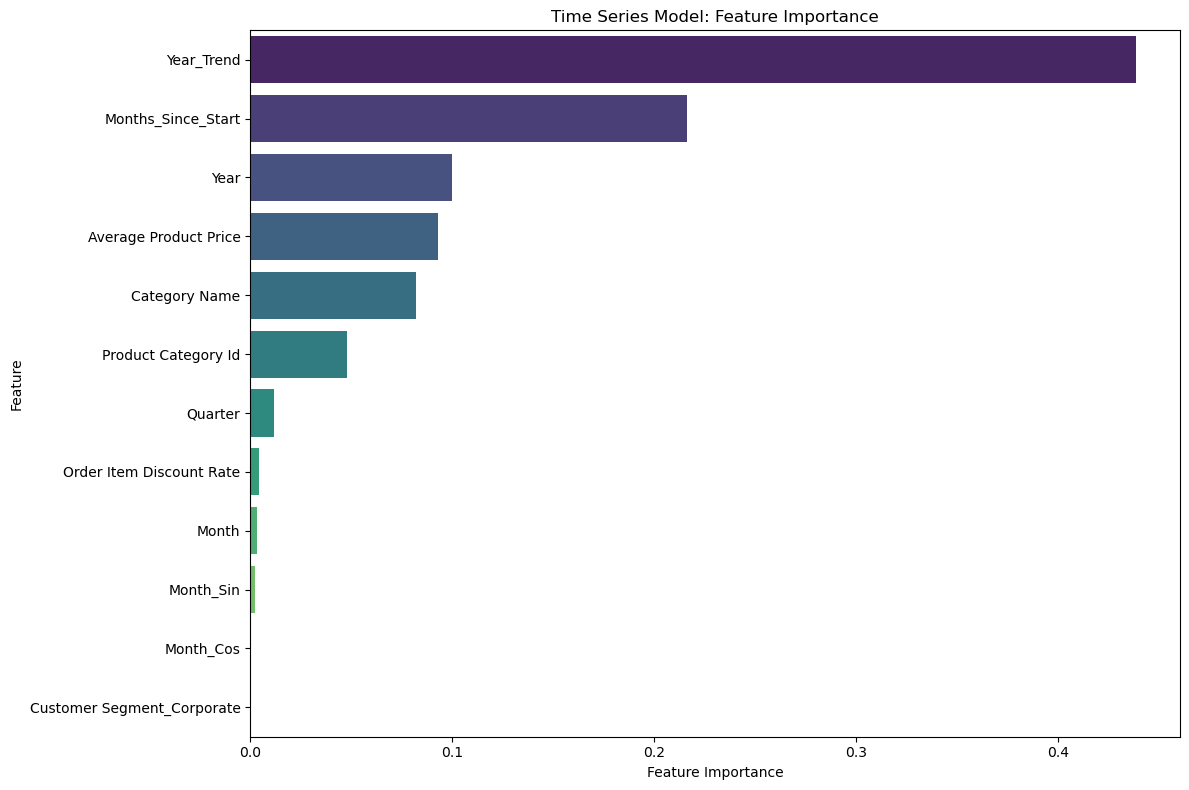

In [35]:
# Get feature importance
feature_importance = model_timeseries.feature_importances_
feature_names = X_timeseries.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("TOP 10 MOST IMPORTANT FEATURES:")
print(importance_df.head(10))

# Analyze time vs business feature importance
time_features = ['Year', 'Month', 'Quarter', 'Months_Since_Start', 'Month_Sin', 'Month_Cos', 'Year_Trend']
time_importance = importance_df[importance_df['Feature'].isin(time_features)]['Importance'].sum()
total_importance = importance_df['Importance'].sum()
time_contribution = (time_importance / total_importance) * 100

print(f"FEATURE IMPORTANCE BREAKDOWN:")
print(f"Time features contribution: {time_contribution:.1f}%")
print(f"Business features contribution: {100-time_contribution:.1f}%")

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = importance_df.head(12)
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title('Time Series Model: Feature Importance')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

#### Testing

In [36]:
def forecast_future_demand(model, le_category, reference_date, future_year_month, 
                          category_name, product_category_id, avg_price, 
                          customer_segment, discount_rate):
    """
    Forecast demand for ANY future month using numerical time features
    """
    
    # Parse the future date
    future_date = pd.to_datetime(future_year_month)
    
    # Calculate time features for the future date
    months_since_start = ((future_date - reference_date).days / 30.44)
    
    # Create test data with numerical time features
    test_data = {
        'Category Name': category_name,
        'Product Category Id': product_category_id,
        'Average Product Price': avg_price,
        'Customer Segment': customer_segment,
        'Order Item Discount Rate': discount_rate,
        # Time features (numerical - can handle ANY future date!)
        'Year': future_date.year,
        'Month': future_date.month,
        'Quarter': future_date.quarter,
        'Months_Since_Start': int(months_since_start),
        'Month_Sin': np.sin(2 * np.pi * future_date.month / 12),
        'Month_Cos': np.cos(2 * np.pi * future_date.month / 12),
        'Year_Trend': future_date.year - reference_date.year
    }
    
    # Create DataFrame
    test_df = pd.DataFrame([test_data])
    
    # Handle unknown category
    if category_name not in le_category.classes_:
        print(f"Unknown category '{category_name}' - using default: {le_category.classes_[0]}")
        test_df['Category Name'] = le_category.classes_[0]
    
    # Encode category
    test_df['Category Name'] = le_category.transform(test_df['Category Name'])
    
    # One-hot encode customer segment
    test_df = pd.get_dummies(test_df, columns=['Customer Segment'], drop_first=True)
    
    # Ensure same columns as training (crucial!)
    test_df = test_df.reindex(columns=X_timeseries.columns, fill_value=0)
    
    # Make prediction
    prediction = model.predict(test_df)[0]
    
    print(f"FORECAST for {future_year_month}: {prediction:.2f} units")
    print(f"Category: {category_name}")
    print(f"Features used: {test_df.iloc[0].to_dict()}")
    
    return prediction

# Get reference date for calculations
reference_date = pd.to_datetime(df['Order YearMonth'].min()) if 'Order YearMonth' in df.columns else pd.to_datetime('2015-01-01')

In [47]:
# Test with various future dates
test_scenarios = [
    {
        'future_date': '2025-02',
        'category': "Technology",
        'description': 'February 2025 forecast'
    },
    {
        'future_date': '2026-12',
        'category': le_category.classes_[1] if len(le_category.classes_) > 1 else le_category.classes_[0],
        'description': 'December 2026 forecast'
    },
    {
        'future_date': '2030-06',
        'category': le_category.classes_[0],
        'description': 'June 2030 forecast (far future)'
    }
]

print(f"FORECASTING:")

for scenario in test_scenarios:
    try:
        print(f"\n📅 {scenario['description']}:")
        
        prediction = forecast_future_demand(
            model=model_timeseries,
            le_category=le_category,
            reference_date=reference_date,
            future_year_month=scenario['future_date'],
            category_name=scenario['category'],
            product_category_id=40,
            avg_price=25.50,
            customer_segment='Consumer',
            discount_rate=0.08
        )
        
        print(f"SUCCESS: {prediction:.2f} units predicted")
        
    except Exception as e:
        print(f"Error: {e}")

FORECASTING:

📅 February 2025 forecast:
FORECAST for 2025-02: 108.70 units
Category: Technology
Features used: {'Category Name': 34.0, 'Product Category Id': 40.0, 'Average Product Price': 25.5, 'Order Item Discount Rate': 0.08, 'Year': 2025.0, 'Month': 2.0, 'Quarter': 1.0, 'Months_Since_Start': 121.0, 'Month_Sin': 0.8660254037844386, 'Month_Cos': 0.5000000000000001, 'Year_Trend': 10.0, 'Customer Segment_Corporate': 0.0, 'Customer Segment_Home Office': 0.0}
SUCCESS: 108.70 units predicted

📅 December 2026 forecast:
FORECAST for 2026-12: 37.26 units
Category: As Seen on  TV!
Features used: {'Category Name': 1.0, 'Product Category Id': 40.0, 'Average Product Price': 25.5, 'Order Item Discount Rate': 0.08, 'Year': 2026.0, 'Month': 12.0, 'Quarter': 4.0, 'Months_Since_Start': 142.0, 'Month_Sin': -2.4492935982947064e-16, 'Month_Cos': 1.0, 'Year_Trend': 11.0, 'Customer Segment_Corporate': 0.0, 'Customer Segment_Home Office': 0.0}
SUCCESS: 37.26 units predicted

📅 June 2030 forecast (far futur

# SAVING THE MODEL 

In [15]:
import joblib
import pickle
import os

# Create model directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save the XGBoost time series model
joblib.dump(model_timeseries, 'model/salesforecast_model.pkl')

# Save preprocessing components
preprocessor_data = {
    'label_encoder_category': le_category,
    'feature_columns': X_timeseries.columns.tolist(),
    'reference_date': reference_date,
    'unique_categories': le_category.classes_.tolist(),
    'customer_segments': [col for col in X_timeseries.columns if 'Customer_Segment_' in col],
    'model_type': 'XGBoost_TimeSeries',
    'model_performance': {
        'r2_score': r2_ts,
        'rmse': rmse_ts,
        'mae': mae_ts,
        'mape': mape_ts
    }
}

with open('model/salesforecast_preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor_data, f)

print("✅ Model and preprocessor saved successfully!")
print("Saved files:")
print("- model/salesforecast_model.pkl (XGBoost time series model)")
print("- model/salesforecast_preprocessor.pkl (preprocessing components)")
print(f"- Model performance: R² = {r2_ts:.4f}, MAPE = {mape_ts:.2f}%")
print(f"- Available categories: {le_category.classes_.tolist()}")

✅ Model and preprocessor saved successfully!
Saved files:
- model/salesforecast_model.pkl (XGBoost time series model)
- model/salesforecast_preprocessor.pkl (preprocessing components)
- Model performance: R² = 0.9578, MAPE = 86.24%
- Available categories: ['Accessories', 'As Seen on  TV!', 'Baby ', 'Baseball & Softball', 'Basketball', 'Books ', 'Boxing & MMA', 'CDs ', 'Cameras ', 'Camping & Hiking', 'Cardio Equipment', "Children's Clothing", 'Cleats', 'Computers', 'Consumer Electronics', 'Crafts', 'DVDs', 'Electronics', 'Fishing', 'Fitness Accessories', 'Garden', "Girls' Apparel", 'Golf Apparel', 'Golf Bags & Carts', 'Golf Balls', 'Golf Gloves', 'Golf Shoes', 'Health and Beauty', 'Hockey', 'Hunting & Shooting', 'Indoor/Outdoor Games', "Kids' Golf Clubs", 'Lacrosse', "Men's Clothing", "Men's Footwear", "Men's Golf Clubs", 'Music', 'Pet Supplies', 'Shop By Sport', 'Soccer', 'Sporting Goods', 'Strength Training', 'Tennis & Racquet', 'Toys', 'Trade-In', 'Video Games', 'Water Sports', "Wome